**LAB-3**

**DATASET**

In [6]:
# Importing and Data present in dataset loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Loading the dataset
def loading_dataset111(filepath111: str) -> pd.DataFrame:
    return pd.read_csv(filepath111)

# Preview of the data to check the contents present in dataset
df123= loading_dataset111('processed_fluency_dataset.csv')
df123.head()

,filename,duration,rms,zcr,tempo,student_id,type,fluency,fluency_encoded
0,175t5.wav,5.416009,0.016158,0.045045,[198.76802885],175,t,Average,0
1,175t7.wav,2.354966,0.030247,0.041107,[151.99908088],175,t,Poor,2
2,175t21.wav,26.829887,0.029869,0.044501,[161.49902344],175,t,Fluent,1
3,175t15.wav,2.434014,0.023221,0.035352,[99.38401442],175,t,Poor,2
4,175t6.wav,7.928027,0.023887,0.040320,[123.046875],175,t,Average,0


**A1: Intraclass Spread & Interclass Distance**

In [7]:
# A1: Calculating Intraclass Spread and Interclass Distance
# Creating the function to compute class centroids, spread, and distance
def getting_intraclass1_interclass1_stats2(df11, feature_columns1, label_column1, class11, class21):
    # Filtering only the selected classes
    df123_sub = df123[df123[label_column1].isin([class11, class21])]
    # Extracting feature vectors for class11 and converting to float
    vecs_123 = df123_sub[df123_sub[label_column1] == class11][feature_columns1].values.astype(float)
    # Extracting feature vectors for class21 and converting to float
    vecs_213 = df123_sub[df123_sub[label_column1] == class21][feature_columns1].values.astype(float)

    # Computing the centroid (mean vector) of class11
    centroid12 = vecs_123.mean(axis=0)
    # Computing the centroid (mean vector) of class21
    centroid21 = vecs_213.mean(axis=0)

    # Calculating the spread (standard deviation) of class11 feature vectors
    spread12 = vecs_123.std(axis=0)
    # Calculating the spread (standard deviation) of class21 feature vectors
    spread21 = vecs_213.std(axis=0)

    # Computing the interclass distance between the two centroids using Euclidean norm
    interclass_dist1 = np.linalg.norm(centroid12 - centroid21)

    # Returning computed values
    return centroid12, centroid21, spread12, spread21, interclass_dist1

# Auto selecting numeric features only
feature_columns1 = df123.select_dtypes(include=[np.number]).columns[:-1].tolist()
# Identifying the label/target column (assumed to be the last column)
label_column1 = df123.columns[-1]
# Extracting unique class labels from the dataset
class_labels1 = df123[label_column1].unique()
# Choosing any two classes (here, the first two)
c1, c2 = class_labels1[0], class_labels1[1]

# Getting centroids, spreads, and interclass distance
centroid1, centroid2, spread1, spread2, distance = getting_intraclass1_interclass1_stats2(df123, feature_columns1, label_column1, c1, c2)

# printing the results
print("Centroid of class 1:", centroid1)
print("Centroid of class 2:", centroid2)
print("Spread of class 1:", spread1)
print("Spread of class 2:", spread2)
print("Interclass Distance:", distance)

Centroid of class 1: [1.12793644e+01 2.33961438e-02 4.62870248e-02 2.20835404e+02]
Centroid of class 2: [1.07568853e+01 1.71766321e-02 5.03128788e-02 2.21331864e+02]
Spread of class 1: [1.15528390e+01 7.39604150e-03 5.16751767e-03 2.12282486e+01]
Spread of class 2: [1.42653345e+01 1.15840202e-02 1.18080084e-02 2.13197161e+01]
Interclass Distance: 0.7207719136945728


**A2: Histogram + Mean & Variance**

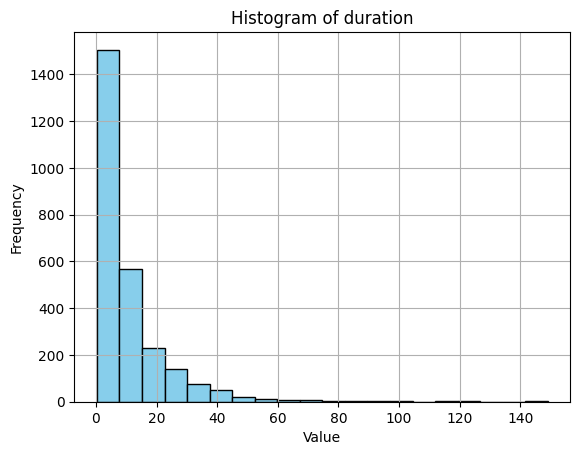

Mean: 11.015888679295735, Variance: 177.50886829502682


In [8]:
# A2: Feature Distribution - Histogram, Mean, and Variance
# Defining a function to analyze and visualize the distribution of a given feature
def feature_distribution11(df11, feature: str, bins=20):
    # Extracting values of the selected feature column
    values = df123[feature].values
    # Calculating mean and variance of the feature
    mean = np.mean(values)
    var = np.var(values)

    # Plotting histogram of the feature values
    plt.hist(values, bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Return calculated statistics
    return mean, var

# Selecting the first numeric feature from the list
feat = feature_columns1[0]
# Calling the function to get mean and variance, and also visualize the histogram
mean, var = feature_distribution11(df123, feat)
# printing the result
print(f"Mean: {mean}, Variance: {var}")

**A3: Minkowski Distance Plot**

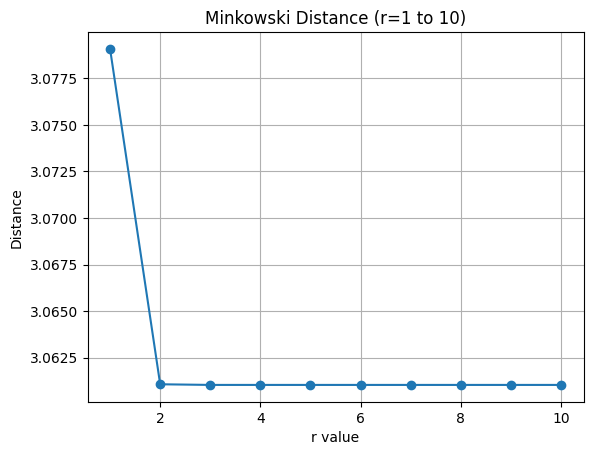

In [9]:
# A3: Minkowski Distance Plot for r = 1 to 10
# Importing Minkowski distance function
from scipy.spatial.distance import minkowski

# Defining a function to calculate and plot Minkowski distances for different r values
def minkowski_plot123(vec1, vec2, max_r=10):
    # Computing Minkowski distance between vec1 and vec2 for each r from 1 to max_r
    distances = [minkowski(vec1, vec2, r) for r in range(1, max_r+1)]
    # Plotting the distances against their corresponding r values
    plt.plot(range(1, max_r+1), distances, marker='o')
    plt.title('Minkowski Distance (r=1 to 10)')
    plt.xlabel('r value')
    plt.ylabel('Distance')
    plt.grid(True)
    plt.show()
    # Returning the list of calculated distances
    return distances


# Selecting two sample feature vectors (first two rows) from the dataset
vi1 = df123[feature_columns1].iloc[0].values
vi2 = df123[feature_columns1].iloc[1].values
# Calling the function to compute and plot Minkowski distances
dists = minkowski_plot123(vi1, vi2)

**A4: Train-Test Split**

In [10]:
# A4: Split Dataset into Training and Test Sets
# Defining a function to split dataset into training and test sets
def split_data12(df, feature_cols, label_col, test_size=0.3):
    # Extracting the feature matrix (X) using the selected feature columns
    X = df[feature_cols].values
    # Extracting the target vector (y) using the label column
    y = df[label_col].values
    return train_test_split(X, y, test_size=test_size, random_state=42)

filtered_df = df123[df123[label_column1].isin([c1, c2])]
# Calling the function to get training and testing splits
X_train, X_test, y_train, y_test = split_data12(df123[df123[label_column1].isin([c1, c2])], feature_columns1, label_column1)

**A5: Train kNN Classifier (k=3)**

In [13]:
# A5: Train a k-Nearest Neighbors (kNN) Classifier
# Defining a function to initialize and train a kNN model
def train_knn_classifier123(X_train, y_train, k=3):
    # Creating an instance of KNeighborsClassifier with k neighbors
    model = KNeighborsClassifier(n_neighbors=k)
    # Training the model using the training feature set and corresponding labels
    model.fit(X_train, y_train)
    # Return the trained kNN model
    return model

# Training kNN
knn_model = train_knn_classifier123(X_train, y_train, k=3)

**A6: Accuracy on Test Set**

In [14]:
# A6: Evaluate Accuracy of the Trained kNN Classifier
# Defining a function to compute the accuracy of the model on test data
def get_accuracy123(model, X_test, y_test):
    # Using the built-in score() method to return the mean accuracy on the given test data and labels
    return model.score(X_test, y_test)

# Using the trained kNN model to evaluate its accuracy on the test set
accuracy1 = get_accuracy123(knn_model, X_test, y_test)
# Printing the computed accuracy
print(f"Test Accuracy (k=3): {accuracy1}")

Test Accuracy (k=3): 0.6088657105606258


**A7: Predictions**

In [15]:
# A7: Predict Class Labels Using the Trained kNN Classifier
# Defining a function to make predictions using the trained model
def predict_labels123(model, X_test):
    # Predicting the labels (classes) for the test data
    return model.predict(X_test)

# Uses the trained kNN model to predict labels for the test feature vectors
predictions2 = predict_labels123(knn_model, X_test)
# Printing the first 10 predicted class labels as a sample output
print("Sample Predictions:", predictions2[:10])

Sample Predictions: [0 0 0 2 2 2 2 2 2 0]


**A8: Accuracy vs k Plot**

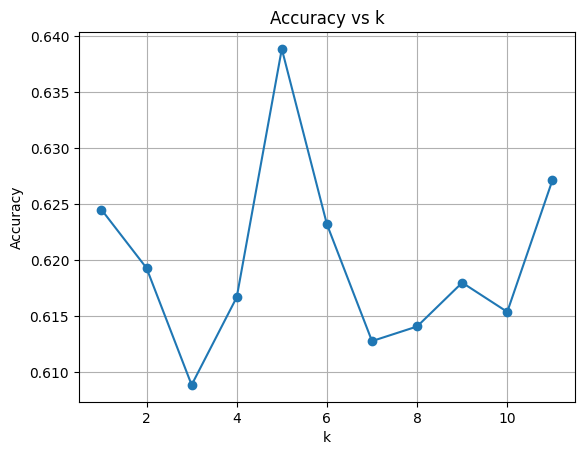

In [16]:
# A8: Plot Accuracy of kNN Classifier for Varying k (1 to max_k)
# Defining a function to evaluate and plot model accuracy for multiple k values
def plot_accuracy_vs_k2(X_train, y_train, X_test, y_test, max_k=11):
    # Creating a list of k values from 1 to max_k (inclusive)
    k_vals23 = list(range(1, max_k+1))
    accs23 = []

    # Loop through each k value to train and evaluate a kNN model
    for k in k_vals23:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        accs23.append(model.score(X_test, y_test))

    # Plotting the accuracy vs. k values
    plt.plot(k_vals23, accs23, marker='o')
    plt.title("Accuracy vs k")
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()

    # Return the list of k values and their corresponding accuracies
    return k_vals23, accs23

# Calling the function to compute and plot accuracy for k = 1 to 11
ks, acc_scores = plot_accuracy_vs_k2(X_train, y_train, X_test, y_test)

**A9: Confusion Matrix & Metrics**

In [17]:
# A9: Evaluate Model with Confusion Matrix and Classification Report

# Defining a function to evaluate a trained classifier on any dataset (train or test)
def evaluate_model123(model, X, y):
    # Predicting class labels using the trained model
    y_pred = model.predict(X)
    # Generating the confusion matrix to compare actual vs predicted labels
    cm = confusion_matrix(y, y_pred)
    # Generating classification report (precision, recall, F1-score, accuracy)
    report = classification_report(y, y_pred, output_dict=True)
    # Return both evaluation results
    return cm, report

# Evaluating the trained kNN model (k=3) on the training dataset
conf_matrix_train, metrics_train = evaluate_model123(knn_model, X_train, y_train)
# Printing the confusion matrix showing TP, TN, FP, FN counts (train set)
print("Training Confusion Matrix:\n", conf_matrix_train)
# Printing the full classification report (train set)
print("Training Classification Report:\n", pd.DataFrame(metrics_train).T)

# Evaluating the trained kNN model (k=3) on the test dataset
conf_matrix_test, metrics_test = evaluate_model123(knn_model, X_test, y_test)
# Printing the confusion matrix showing TP, TN, FP, FN counts (test set)
print("\nTest Confusion Matrix:\n", conf_matrix_test)
# Printing the full classification report (test set)
print("Test Classification Report:\n", pd.DataFrame(metrics_test).T)

# Simple logic to interpret model behavior
train_acc = metrics_train['accuracy']
test_acc = metrics_test['accuracy']

# Printing model fit inference
print("\nModel Fit Inference:")
if train_acc - test_acc > 0.1:
    print("The model may be overfitting (high train accuracy, lower test accuracy).")
elif test_acc < 0.6:
    print("The model may be underfitting (low accuracy on both train and test sets).")
else:
    print("The model is well-fitted (regular fit) with balanced train and test performance.")


Training Confusion Matrix:
 [[484 191]
 [154 958]]
Training Classification Report:
               precision    recall  f1-score      support
0              0.758621  0.717037  0.737243   675.000000
2              0.833768  0.861511  0.847413  1112.000000
accuracy       0.806939  0.806939  0.806939     0.806939
macro avg      0.796195  0.789274  0.792328  1787.000000
weighted avg   0.805383  0.806939  0.805798  1787.000000

Test Confusion Matrix:
 [[129 162]
 [138 338]]
Test Classification Report:
               precision    recall  f1-score     support
0              0.483146  0.443299  0.462366  291.000000
2              0.676000  0.710084  0.692623  476.000000
accuracy       0.608866  0.608866  0.608866    0.608866
macro avg      0.579573  0.576692  0.577494  767.000000
weighted avg   0.602831  0.608866  0.605263  767.000000

Model Fit Inference:
The model may be overfitting (high train accuracy, lower test accuracy).


In [19]:
# A9: Evaluate Model with Confusion Matrix and Classification Report
# Defining a function to evaluate a trained classifier on test data
def evaluate_model123(model, X_test, y_test):
    # Predicting class labels for test set using the trained model
    y_pred2 = model.predict(X_test)
    # Generatig the confusion matrix to compare actual vs predicted labels
    cm2 = confusion_matrix(y_test, y_pred2)
    report2 = classification_report(y_test, y_pred2, output_dict=True)
    # Return both evaluation results
    return cm2, report2

# Evaluating the trained kNN model (k=3) on the test dataset
conf_matrix1, metrics1 = evaluate_model123(knn_model, X_test, y_test)
# Printing the confusion matrix showing TP, TN, FP, FN counts
print("Confusion Matrix:\n", conf_matrix1)
# Printing the full classification report including precision, recall, and F1-score
print("Classification Report:\n", pd.DataFrame(metrics1).T)

Confusion Matrix:
 [[129 162]
 [138 338]]
Classification Report:
               precision    recall  f1-score     support
0              0.483146  0.443299  0.462366  291.000000
2              0.676000  0.710084  0.692623  476.000000
accuracy       0.608866  0.608866  0.608866    0.608866
macro avg      0.579573  0.576692  0.577494  767.000000
weighted avg   0.602831  0.608866  0.605263  767.000000


In [21]:
# Defining a function to evaluate a trained classifier on any dataset (train or test)
def evaluate_model112(model, X, y):
    # Predicting class labels using the trained model
    y_pred = model.predict(X)
    # Generating the confusion matrix to compare actual vs predicted labels
    cm = confusion_matrix(y, y_pred)
    # Generating classification report (precision, recall, F1-score, accuracy)
    report = classification_report(y, y_pred, output_dict=True)
    # Return both evaluation results
    return cm, report

# Evaluating the trained kNN model (k=3) on the training dataset
conf_matrix_train, metrics_train = evaluate_model112(knn_model, X_train, y_train)
# Printing the confusion matrix showing TP, TN, FP, FN counts (train set)
print("Training Confusion Matrix:\n", conf_matrix_train)
# Printing the full classification report (train set)
print("Training Classification Report:\n", pd.DataFrame(metrics_train).T)

# Evaluating the trained kNN model (k=3) on the test dataset
conf_matrix_test, metrics_test = evaluate_model112(knn_model, X_test, y_test)
# Printing the confusion matrix showing TP, TN, FP, FN counts (test set)
print("\nTest Confusion Matrix:\n", conf_matrix_test)
# Printing the full classification report (test set)
print("Test Classification Report:\n", pd.DataFrame(metrics_test).T)

# Simple logic to interpret model behavior
train_acc = metrics_train['accuracy']
test_acc = metrics_test['accuracy']

# Printing model fit inference
print("\nModel Fit Inference:")
if train_acc - test_acc > 0.1:
    print("The model may be overfitting (high train accuracy, lower test accuracy).")
elif test_acc < 0.6:
    print("The model may be underfitting (low accuracy on both train and test sets).")
else:
    print("The model is well-fitted (regular fit) with balanced train and test performance.")

Training Confusion Matrix:
 [[484 191]
 [154 958]]
Training Classification Report:
               precision    recall  f1-score      support
0              0.758621  0.717037  0.737243   675.000000
2              0.833768  0.861511  0.847413  1112.000000
accuracy       0.806939  0.806939  0.806939     0.806939
macro avg      0.796195  0.789274  0.792328  1787.000000
weighted avg   0.805383  0.806939  0.805798  1787.000000

Test Confusion Matrix:
 [[129 162]
 [138 338]]
Test Classification Report:
               precision    recall  f1-score     support
0              0.483146  0.443299  0.462366  291.000000
2              0.676000  0.710084  0.692623  476.000000
accuracy       0.608866  0.608866  0.608866    0.608866
macro avg      0.579573  0.576692  0.577494  767.000000
weighted avg   0.602831  0.608866  0.605263  767.000000

Model Fit Inference:
The model may be overfitting (high train accuracy, lower test accuracy).


**O1. Compare Normal Distribution with Histogram**

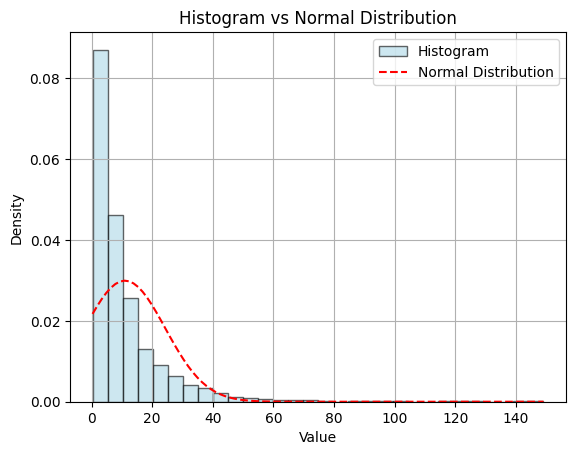

Mean: 11.015888679295735, Std Dev: 13.323245411498911


In [22]:
# O1: Compare Feature Distribution with Normal Distribution
from scipy.stats import norm

# Defining a function to plot both histogram and normal distribution for a feature
def compare_normal_distribution13(feature_values, bins=30):
    # Calculating mean and standard deviation of the feature
    mean = np.mean(feature_values)
    std = np.std(feature_values)

    # Ploting histogram
    plt.hist(feature_values, bins=bins, density=True, alpha=0.6, color='lightblue', edgecolor='black', label='Histogram')

    # Generating x-axis values for normal curve (from min to max of the data)
    x_axis = np.linspace(min(feature_values), max(feature_values), 100)
    # Computing the normal probability density function (PDF)
    y_axis = norm.pdf(x_axis, mean, std)
    # Plotting the normal distribution curve
    plt.plot(x_axis, y_axis, 'r--', label='Normal Distribution')

    plt.title("Histogram vs Normal Distribution")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()
    # Return the computed mean and standard deviation
    return mean, std

# Selecting a numerical feature from your dataset
feature_to_compare1 = feature_columns1[0]
feature_values2 = df123[feature_to_compare1].values
# Calling the function to visualize histogram vs normal distribution
mean, std = compare_normal_distribution13(feature_values2)
print(f"Mean: {mean}, Std Dev: {std}")

**O2. Tune Distance Metric for kNN Classifier**

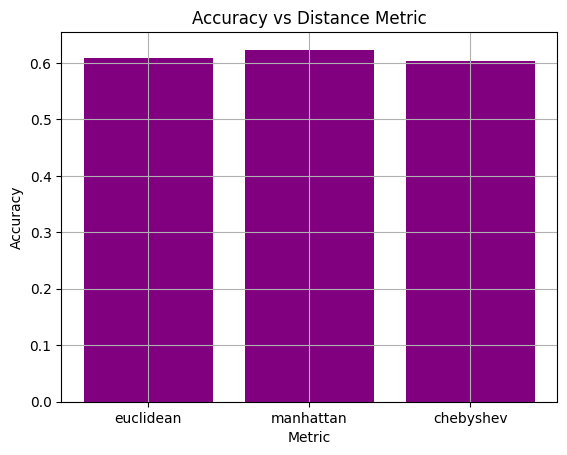

Metric-wise Accuracy: {'euclidean': 0.6088657105606258, 'manhattan': 0.6232073011734028, 'chebyshev': 0.6036505867014341}


In [23]:
# O2: Compare Accuracy of kNN with Different Distance Metrics
# Defining a function to evaluate kNN classifier using various distance metrics
def evaluating_different_metrics123(X_train, y_train, X_test, y_test, metrics=['euclidean', 'manhattan', 'chebyshev']):
    scores = {}
    for metric in metrics:
        # Creating and train a kNN model with the given distance metric
        model = KNeighborsClassifier(n_neighbors=3, metric=metric)
        model.fit(X_train, y_train)
        # Evaluating the model on test data and store accuracy
        score = model.score(X_test, y_test)
        scores[metric] = score

    # Plotting the accuracy for each metric
    plt.bar(scores.keys(), scores.values(), color='purple')
    plt.title("Accuracy vs Distance Metric")
    plt.xlabel("Metric")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()

    # Return the dictionary of metrics and their accuracies
    return scores

# Evaluating kNN accuracy for different distance metrics
metric_scores1 = evaluating_different_metrics123(X_train, y_train, X_test, y_test)
print("Metric-wise Accuracy:", metric_scores1)

**O3. AUROC Plot for kNN Classifier**

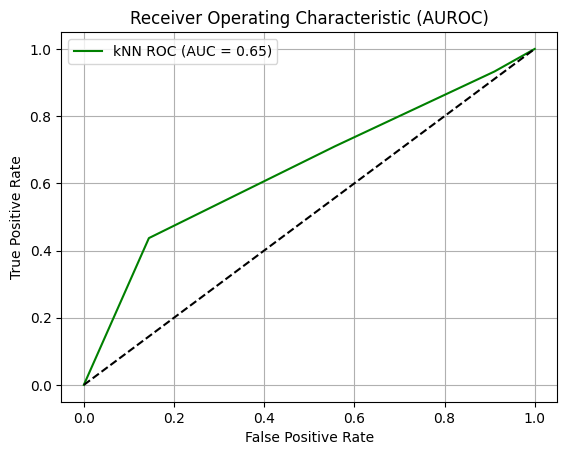

AUC Score: 0.645131248375639


In [24]:
# O3: Plot AUROC Curve and Calculate AUC Score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Defining a function to plot ROC curve and compute AUC for binary classification
def plot_auroc23(model, X_test, y_test):
    # LabelBinarizer is used to convert class labels into binary format (0/1)
    lb2 = LabelBinarizer()
    y_test_bin2 = lb2.fit_transform(y_test).ravel()

    # If the model supports probability prediction, use predict_proba
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)[:, 1]
    else:
        # Fallback if probability is not available (less reliable)
        probs = model.predict(X_test)

    # Calculating False Positive Rate (fpr) and True Positive Rate (tpr)
    fpr2, tpr2, _ = roc_curve(y_test_bin2, probs)
    # Calculating Area Under the Curve (AUC)
    roc_auc = auc(fpr2, tpr2)

    # Plotting the ROC curve
    plt.plot(fpr2, tpr2, label=f'kNN ROC (AUC = {roc_auc:.2f})', color='green')
    plt.plot([0, 1], [0, 1], 'k--')  # random guess
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (AUROC)')
    plt.legend()
    plt.grid(True)
    plt.show()
    # Return the computed AUC score
    return roc_auc

# Plotting AUROC curve and print AUC score for the trained kNN model
auc_score = plot_auroc23(knn_model, X_test, y_test)
print(f"AUC Score: {auc_score}")

**O4. Compare Manual kNN vs Package Model**

In [25]:
# O4: Manual kNN Classifier vs Sklearn kNN Classifier
# Defining a function to manually predict the class using k-Nearest Neighbors
def manual_knn_predict23(X_train, y_train, test_vec, k=1):
    # Computing Euclidean distances between test vector and all training vectors
    distances2 = np.linalg.norm(X_train - test_vec, axis=1)
    # Getting the indices of the k closest training samples
    nearest_indices2 = distances2.argsort()[:k]
    # Getting the class labels of the nearest neighbors
    nearest_labels2 = y_train[nearest_indices2]
    # Determining the most frequent class among the neighbors
    values, counts = np.unique(nearest_labels2, return_counts=True)
    return values[np.argmax(counts)]

# Defining a function to compute accuracy of manual kNN over the entire test set
def manual_knn_evaluate23(X_train, y_train, X_test, y_test, k=1):
    correct = 0
    for i, test_vec in enumerate(X_test):
        # Manually predict class using custom kNN
        pred = manual_knn_predict23(X_train, y_train, test_vec, k)
        if pred == y_test[i]:
            correct += 1
    # Return the accuracy as the ratio of correct predictions to total
    return correct / len(y_test)

# Accuracy of manually implemented 1-NN
manual_acc2 = manual_knn_evaluate23(X_train, y_train, X_test, y_test, k=1)
# Accuracy of scikit-learn's kNN (k=3)
package_acc2 = knn_model.score(X_test, y_test)
# Printing comparison of accuracies
print(f"Manual 1-NN Accuracy: {manual_acc2}")
print(f"Package kNN Accuracy (k=3): {package_acc2}")

Manual 1-NN Accuracy: 0.6245110821382008
Package kNN Accuracy (k=3): 0.6088657105606258
